In [120]:
import sys
import glob
from pathlib import Path
import numpy as np
import imageio

import cv2

import matplotlib.pyplot as plt
from PIL import Image

from scipy.ndimage import convolve

from config import get_config

from SaveConfig import SaveConfig

In [7]:
config, unparsed = get_config()

In [250]:
# SaveConfig does the configurations for saving the ouputs of the problems
save_config = SaveConfig(config.path, config.clean_at_init, config.is_save)
save_config.execute()

# First let's load all images and put them in an numpy array of images
filenames = glob.glob("../images/*.png")

# images is an array of shape (number_of_images, width, height)
images = np.array([imageio.imread(img) for img in filenames])

# Problem 1.1
# Spatial Domain Filtering
# Arguments: kernels
kernel_1 = np.array([
                    [[0, 0, -1, 0, 0],
                    [0, -1, -2, -1, 0],
                    [-1, -2, 16, -2, -1],
                    [0, -1, -2, -1, 0],
                    [0, 0, -1, 0, 0]]
                   ])

kernel_2 = np.array([                
                    [[1, 4, 6, 4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1, 4, 6, 4, 1]]
                   ]) / 256

kernel_3 = np.array([                
                    [[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]
                   ])

kernel_4 = np.array([                
                    [[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]]
                   ])

kernel_6 = np.array([                
                    [[1, 6, 15, 20, 15, 6, 1],                
                    [6, 15, 20, 80, 20, 15, 6],
                    [15, 20, 80, 120, 80, 20, 15],
                    [20, 24, 36, 180, 6, 0, 0],
                    [15, 20, 80, 120, 80, 20, 15],
                    [6, 15, 20, 80, 20, 15, 6],
                    [1, 6, 15, 20, 15, 6, 1]]
                   ])
kernel_6 = kernel_6 / np.sum(kernel_6)

result_1 = np.zeros_like(images)
result_2 = np.zeros_like(images)

result_3 = convolve(np.asarray(images, dtype=np.float64), kernel_3)
result_4 = convolve(np.asarray(images, dtype=np.float64), kernel_4)

result_5 = np.sqrt(np.add(np.power(result_3, [2]), np.power(result_4, [2])))

result = convolve(np.asarray(images, dtype=np.float64), kernel_5)

result = np.where(result < 0, 0, result)
result = np.where(result > 255, 255, result)

np.min(result_5)

0.0

In [219]:
convolve(np.asarray([[[1, 1, 1],[2, 2, 3],[0, 7, 1]]], dtype=np.float64), kernel_5)

array([[[18.48528137, 19.89949494, 21.89949494],
        [22.72792206, 30.24264069, 28.14213562],
        [33.55634919, 28.48528137, 42.38477631]]])

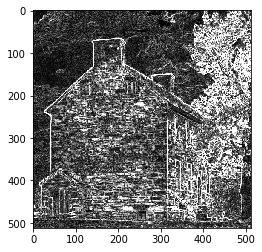

In [233]:
plt.imshow(result_5[1], cmap='gray', vmin=0, vmax=255)

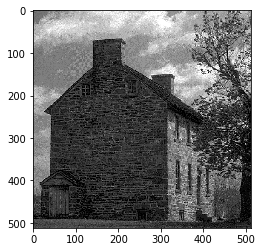

In [234]:
plt.imshow(images[1], cmap='gray', vmin=0, vmax=255)

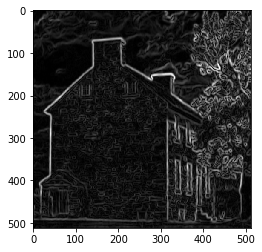

In [256]:
result = convolve(np.asarray(images, dtype=np.float64), kernel_6)
result = convolve(np.asarray(result, dtype=np.float64), kernel_6)
result_v = convolve(np.asarray(result, dtype=np.float64), kernel_3)
result_h = convolve(np.asarray(result, dtype=np.float64), kernel_4)

result_final = np.sqrt(np.add(np.power(result_v, [2]), np.power(result_h, [2])))

# np.asarray(result_final, dtype=np.uint8)
plt.imshow(result_final[1], cmap='gray', vmin=0, vmax=255)

In [3]:

gama = np.array(config.gama)

# Create blocks of gama's size of images, in other words, an array of shape (gama's size, number_of_images, width,
# height)
work_images = np.repeat(images[np.newaxis, :, :, :], gama.size, axis=0)

# First step, convert the images from a [0, 255] range of uint8 to a [0, 1] range of float64
work_images = work_images / 255.0

# Second step, apply the equation B = A^(1/gama)
work_images = work_images ** (1 / gama[:, None, None, None])

# Final step, convert the image back to a [0, 255] range of uint8
work_images = work_images * 255.0
work_images = np.asarray(work_images, dtype=np.uint8)

# Calling save_images
save_config.save_images(work_images, gama, filenames, "1.1")

# End of Problem 1.1

# Problem 1.2
# Bits planes
# Arguments: bits (np.array). Default is [0, 1, 2, 3, 4, 5, 6, 7]
bits = np.array(config.bits)

# Create blocks of gama's size of images, in other words, an array of shape (gama's size, number_of_images, width,
# height)
work_images = np.repeat(images[np.newaxis, :, :, :], bits.size, axis=0)

# First step, create a mask to segment the image's bits planes
bits_mask = np.left_shift(1, bits)

# Final step, do bitwise_and between the images and the mask
binary_images = np.bitwise_and(work_images, bits_mask[:, None, None, None])
binary_images = np.where(binary_images > 0, 255, binary_images)

# Calling save_images
save_config.save_images(binary_images, bits, filenames, "1.2")

# End of problem 1.2

# Problem 1.3
# Mosaic
# Arguments: mosaic_order (np.array)
mosaic_order = np.array([[6, 11, 13, 3], [8, 16, 1, 9], [12, 14, 2, 7], [4, 15, 10, 5]])

work_images = images[0]
work_images.reshape(16, 128, 128)


IndentationError: unexpected indent (<ipython-input-3-1c9425614adc>, line 2)